#  Titanic Kaggle

In [2]:
!kaggle competitions download -c titanic --force

  0%|                                               | 0.00/59.8k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 59.8k/59.8k [00:00<00:00, 3.56MB/s]
  0%|                                               | 0.00/28.0k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 28.0k/28.0k [00:00<00:00, 9.56MB/s]
  0%|                                               | 0.00/3.18k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 3.18k/3.18k [00:00<00:00, 1.25MB/s]


In [3]:
import seaborn as sns
import pandas as pd
import numpy as np

In [4]:
train_df = pd.read_csv("train.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


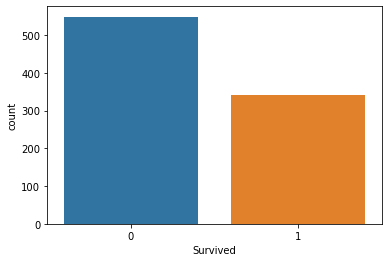

In [21]:
sns.countplot(train_df.Survived)

In [52]:
survival = train_df.groupby(["Sex","Survived"]).count()
survival

PassengerId  Pclass  Name  Age  SibSp  Parch  Ticket  Fare  \
Sex    Survived                                                               
female 0                  81      81    81   64     81     81      81    81   
       1                 233     233   233  197    233    233     233   233   
male   0                 468     468   468  360    468    468     468   468   
       1                 109     109   109   93    109    109     109   109   

                 Cabin  Embarked  
Sex    Survived                   
female 0             6        81  
       1            91       231  
male   0            62       468  
       1            45       109

In [65]:
survival = train_df.groupby(["Sex","Survived"]).count().reset_index()
survived = survival[survival.Survived==1][["Sex","Embarked"]]
not_survived = survival[survival.Survived==0][["Sex","Embarked"]]
survived

,Sex,Embarked
1,female,231
3,male,109


In [72]:
survival = pd.concat([survived,not_survived])
survival

/home/kbaafi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Embarked,Sex,Survived
0,NaN,female,233.0
1,NaN,male,109.0
0,81.0,female,NaN
2,468.0,male,NaN


In [70]:
survived = train_df[train_df.Survived==1].groupby("Sex").count()["Survived"].reset_index()
survived

,Sex,Survived
0,female,233
1,male,109


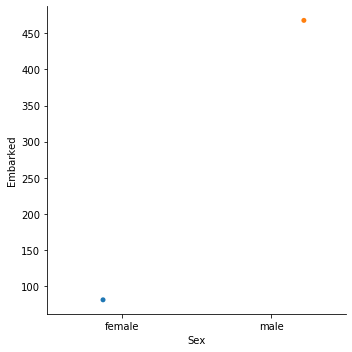

In [73]:
sns.catplot(x="Sex",y = "Embarked",data=survival, jitter='0.25')